# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv",index_col='uuid')
test_data = pd.read_csv("test.csv",index_col='uuid')

In [3]:
train_data.head(10)

,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,x8,target
uuid,,,,,,,,,,,,
0,26,"{""key3"":""67804"",""key2"":""650""}",1689673468244,4,0,41,107,206,1,0,1,0
1,26,"{""key3"":""67804"",""key2"":""484""}",1689082941469,4,0,41,24,283,4,8,1,0
2,8,unknown,1689407393040,4,0,41,71,288,4,7,1,0
3,11,unknown,1689467815688,1,3,41,17,366,1,6,1,0
4,26,"{""key3"":""67804"",""key2"":""650""}",1689491751442,0,3,41,92,383,4,8,1,0
5,11,unknown,1689067902093,0,3,41,104,250,4,8,1,1
6,26,"{""key3"":""67804"",""key2"":""650""}",1689663940234,1,3,41,150,27,1,6,1,0
7,11,unknown,1689328220292,0,3,41,143,347,4,7,1,0
8,34,"{""key3"":""82379""}",1689493305660,4,0,41,24,338,1,2,0,0


In [5]:
#是否需要填补空缺值
train_data.isna().sum()

eid          0
udmap        0
common_ts    0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
target       0
dtype: int64

In [6]:
#拆分udmp特征
def udmap_onehot(d):
    v = np.zeros(9)
    if d == 'unknown':
        return v
    
    d = eval(d)
    for i in range(1,10):
        if 'key' + str(i) in d:
            v[i-1] = d['key' + str(i)]
    
    return v

In [7]:
train_udmap_df = pd.DataFrame(np.vstack(train_data['udmap'].apply(udmap_onehot)))
test_udmap_df = pd.DataFrame(np.vstack(test_data['udmap'].apply(udmap_onehot)))

In [8]:
train_udmap_df.columns = ['key'+str(i) for i in range(1,10)]
test_udmap_df.columns = ['key'+str(i) for i in range(1,10)]

In [9]:
train_data['eid_freq'] = train_data['eid'].map(train_data['eid'].value_counts())
test_data['eid_freq'] = test_data['eid'].map(train_data['eid'].value_counts())

train_data['eid_mean'] = train_data['eid'].map(train_data.groupby('eid')['target'].mean())
test_data['eid_mean'] = test_data['eid'].map(train_data.groupby('eid')['target'].mean())

In [10]:
train_data['udmap_isunknown'] = (train_data['udmap'] == 'unknown').astype(int)
test_data['udmap_isunknown'] = (test_data['udmap'] == 'unknown').astype(int)

In [12]:
#拆分common_ts特征，提取出小时、日期、分钟、星期、时钟+分钟
train_data['common_ts'] = pd.to_datetime(train_data['common_ts'], unit='ms')
test_data['common_ts'] = pd.to_datetime(test_data['common_ts'], unit='ms')

train_data['common_ts_hour'] = train_data['common_ts'].dt.hour
test_data['common_ts_hour'] = test_data['common_ts'].dt.hour

train_data['common_ts_day'] = train_data['common_ts'].dt.day
test_data['common_ts_day'] = test_data['common_ts'].dt.day

train_data['common_ts_minute'] = train_data['common_ts'].dt.minute
test_data['common_ts_minute'] = test_data['common_ts'].dt.minute

train_data['common_ts_weekday'] = train_data['common_ts'].dt.weekday
test_data['common_ts_weekday'] = test_data['common_ts'].dt.weekday

train_data['common_ts_hour_minute'] = train_data['common_ts'].dt.hour*60 + train_data['common_ts'].dt.minute
test_data['common_ts_hour_minute'] = test_data['common_ts'].dt.hour*60 + test_data['common_ts'].dt.minute

In [13]:
#提取类别特征的频率和在target下的均值
train_data['x1_freq'] = train_data['x1'].map(train_data['x1'].value_counts())
test_data['x1_freq'] = test_data['x1'].map(train_data['x1'].value_counts())
train_data['x1_mean'] = train_data['x1'].map(train_data.groupby('x1')['target'].mean())
test_data['x1_mean'] = test_data['x1'].map(train_data.groupby('x1')['target'].mean())

train_data['x2_freq'] = train_data['x2'].map(train_data['x2'].value_counts())
test_data['x2_freq'] = test_data['x2'].map(train_data['x2'].value_counts())
train_data['x2_mean'] = train_data['x2'].map(train_data.groupby('x2')['target'].mean())
test_data['x2_mean'] = test_data['x2'].map(train_data.groupby('x2')['target'].mean())

train_data['x3_freq'] = train_data['x3'].map(train_data['x3'].value_counts())
test_data['x3_freq'] = test_data['x3'].map(train_data['x3'].value_counts())

train_data['x4_freq'] = train_data['x4'].map(train_data['x4'].value_counts())
test_data['x4_freq'] = test_data['x4'].map(train_data['x4'].value_counts())

train_data['x6_freq'] = train_data['x6'].map(train_data['x6'].value_counts())
test_data['x6_freq'] = test_data['x6'].map(train_data['x6'].value_counts())
train_data['x6_mean'] = train_data['x6'].map(train_data.groupby('x6')['target'].mean())
test_data['x6_mean'] = test_data['x6'].map(train_data.groupby('x6')['target'].mean())

train_data['x7_freq'] = train_data['x7'].map(train_data['x7'].value_counts())
test_data['x7_freq'] = test_data['x7'].map(train_data['x7'].value_counts())
train_data['x7_mean'] = train_data['x7'].map(train_data.groupby('x7')['target'].mean())
test_data['x7_mean'] = test_data['x7'].map(train_data.groupby('x7')['target'].mean())

train_data['x8_freq'] = train_data['x8'].map(train_data['x8'].value_counts())
test_data['x8_freq'] = test_data['x8'].map(train_data['x8'].value_counts())
train_data['x8_mean'] = train_data['x8'].map(train_data.groupby('x8')['target'].mean())
test_data['x8_mean'] = test_data['x8'].map(train_data.groupby('x8')['target'].mean())

In [14]:
#对类别特征进行目标编码
import sklearn.base as base
from sklearn.model_selection import KFold

class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True, random_state=2019)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] =    X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName,                    
                   np.corrcoef(X[self.targetName].values,
                               encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [15]:
list_trans = ['x1','x2','x6','x7','x8']
for tran in list_trans:
    targetc = KFoldTargetEncoderTrain(tran,'target',n_fold=5)
    new_train = targetc.fit_transform(train_data)

Correlation between the new feature, x1_Kfold_Target_Enc and, target is 0.0544300029667406.
Correlation between the new feature, x2_Kfold_Target_Enc and, target is 0.07606441106701993.
Correlation between the new feature, x6_Kfold_Target_Enc and, target is 0.030413951392757852.
Correlation between the new feature, x7_Kfold_Target_Enc and, target is 0.22461294580829466.
Correlation between the new feature, x8_Kfold_Target_Enc and, target is 0.12766118811829685.


In [16]:
#将训练集得到的类别对应的目标编码应用到测试集中
x1_encode = dict(zip(train_data.x1,train_data.x1_Kfold_Target_Enc))
x2_encode = dict(zip(train_data.x2,train_data.x2_Kfold_Target_Enc))
x6_encode = dict(zip(train_data.x6,train_data.x6_Kfold_Target_Enc))
x7_encode = dict(zip(train_data.x7,train_data.x7_Kfold_Target_Enc))
x8_encode = dict(zip(train_data.x8,train_data.x8_Kfold_Target_Enc))

test_data['x1_Kfold_Target_Enc'] = test_data.x1.map(x1_encode)
test_data['x2_Kfold_Target_Enc'] = test_data.x2.map(x2_encode)
test_data['x6_Kfold_Target_Enc'] = test_data.x6.map(x6_encode)
test_data['x7_Kfold_Target_Enc'] = test_data.x7.map(x7_encode)
test_data['x8_Kfold_Target_Enc'] = test_data.x8.map(x8_encode)

In [17]:
train_data

,eid,udmap,common_ts,x1,x2,x3,x4,x5,x6,x7,...,x6_mean,x7_freq,x7_mean,x8_freq,x8_mean,x1_Kfold_Target_Enc,x2_Kfold_Target_Enc,x6_Kfold_Target_Enc,x7_Kfold_Target_Enc,x8_Kfold_Target_Enc
uuid,,,,,,,,,,,,,,,,,,,,,
0,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-18 09:44:28.244,4,0,41,107,206,1,0,...,0.153811,39042,0.358153,530689,0.122320,0.139536,0.126220,0.154037,0.359656,0.122597
1,26,"{""key3"":""67804"",""key2"":""484""}",2023-07-11 13:42:21.469,4,0,41,24,283,4,8,...,0.133067,77262,0.114649,530689,0.122320,0.139620,0.126675,0.133355,0.115264,0.122389
2,8,unknown,2023-07-15 07:49:53.040,4,0,41,71,288,4,7,...,0.133067,185272,0.107151,530689,0.122320,0.139582,0.127163,0.133610,0.107823,0.122623
3,11,unknown,2023-07-16 00:36:55.688,1,3,41,17,366,1,6,...,0.153811,130071,0.091688,530689,0.122320,0.129708,0.130535,0.153841,0.091810,0.122276
4,26,"{""key3"":""67804"",""key2"":""650""}",2023-07-16 07:15:51.442,0,3,41,92,383,4,8,...,0.133067,77262,0.114649,530689,0.122320,0.136287,0.130535,0.132834,0.114710,0.122276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620351,2,"{""key4"":""14"",""key5"":""14""}",2023-07-10 12:07:30.527,4,0,41,104,37,4,4,...,0.133067,16282,0.112701,530689,0.122320,0.139582,0.127163,0.133610,0.115150,0.122623
620352,8,unknown,2023-07-16 06:51:42.305,4,0,41,104,37,1,6,...,0.153811,130071,0.091688,530689,0.122320,0.139309,0.126655,0.153841,0.091810,0.122276
620353,41,"{""key1"":""274"",""key2"":""446""}",2023-07-09 08:41:18.584,0,2,41,104,37,4,2,...,0.133067,89667,0.248553,89667,0.248553,0.136287,0.204509,0.132834,0.247406,0.247406


In [18]:
train_data = pd.concat([train_data, train_udmap_df], axis=1)
test_data = pd.concat([test_data, test_udmap_df], axis=1)
train_target = train_data['target']
train_data.drop(['udmap', 'common_ts', 'target'], axis=1,inplace=True)

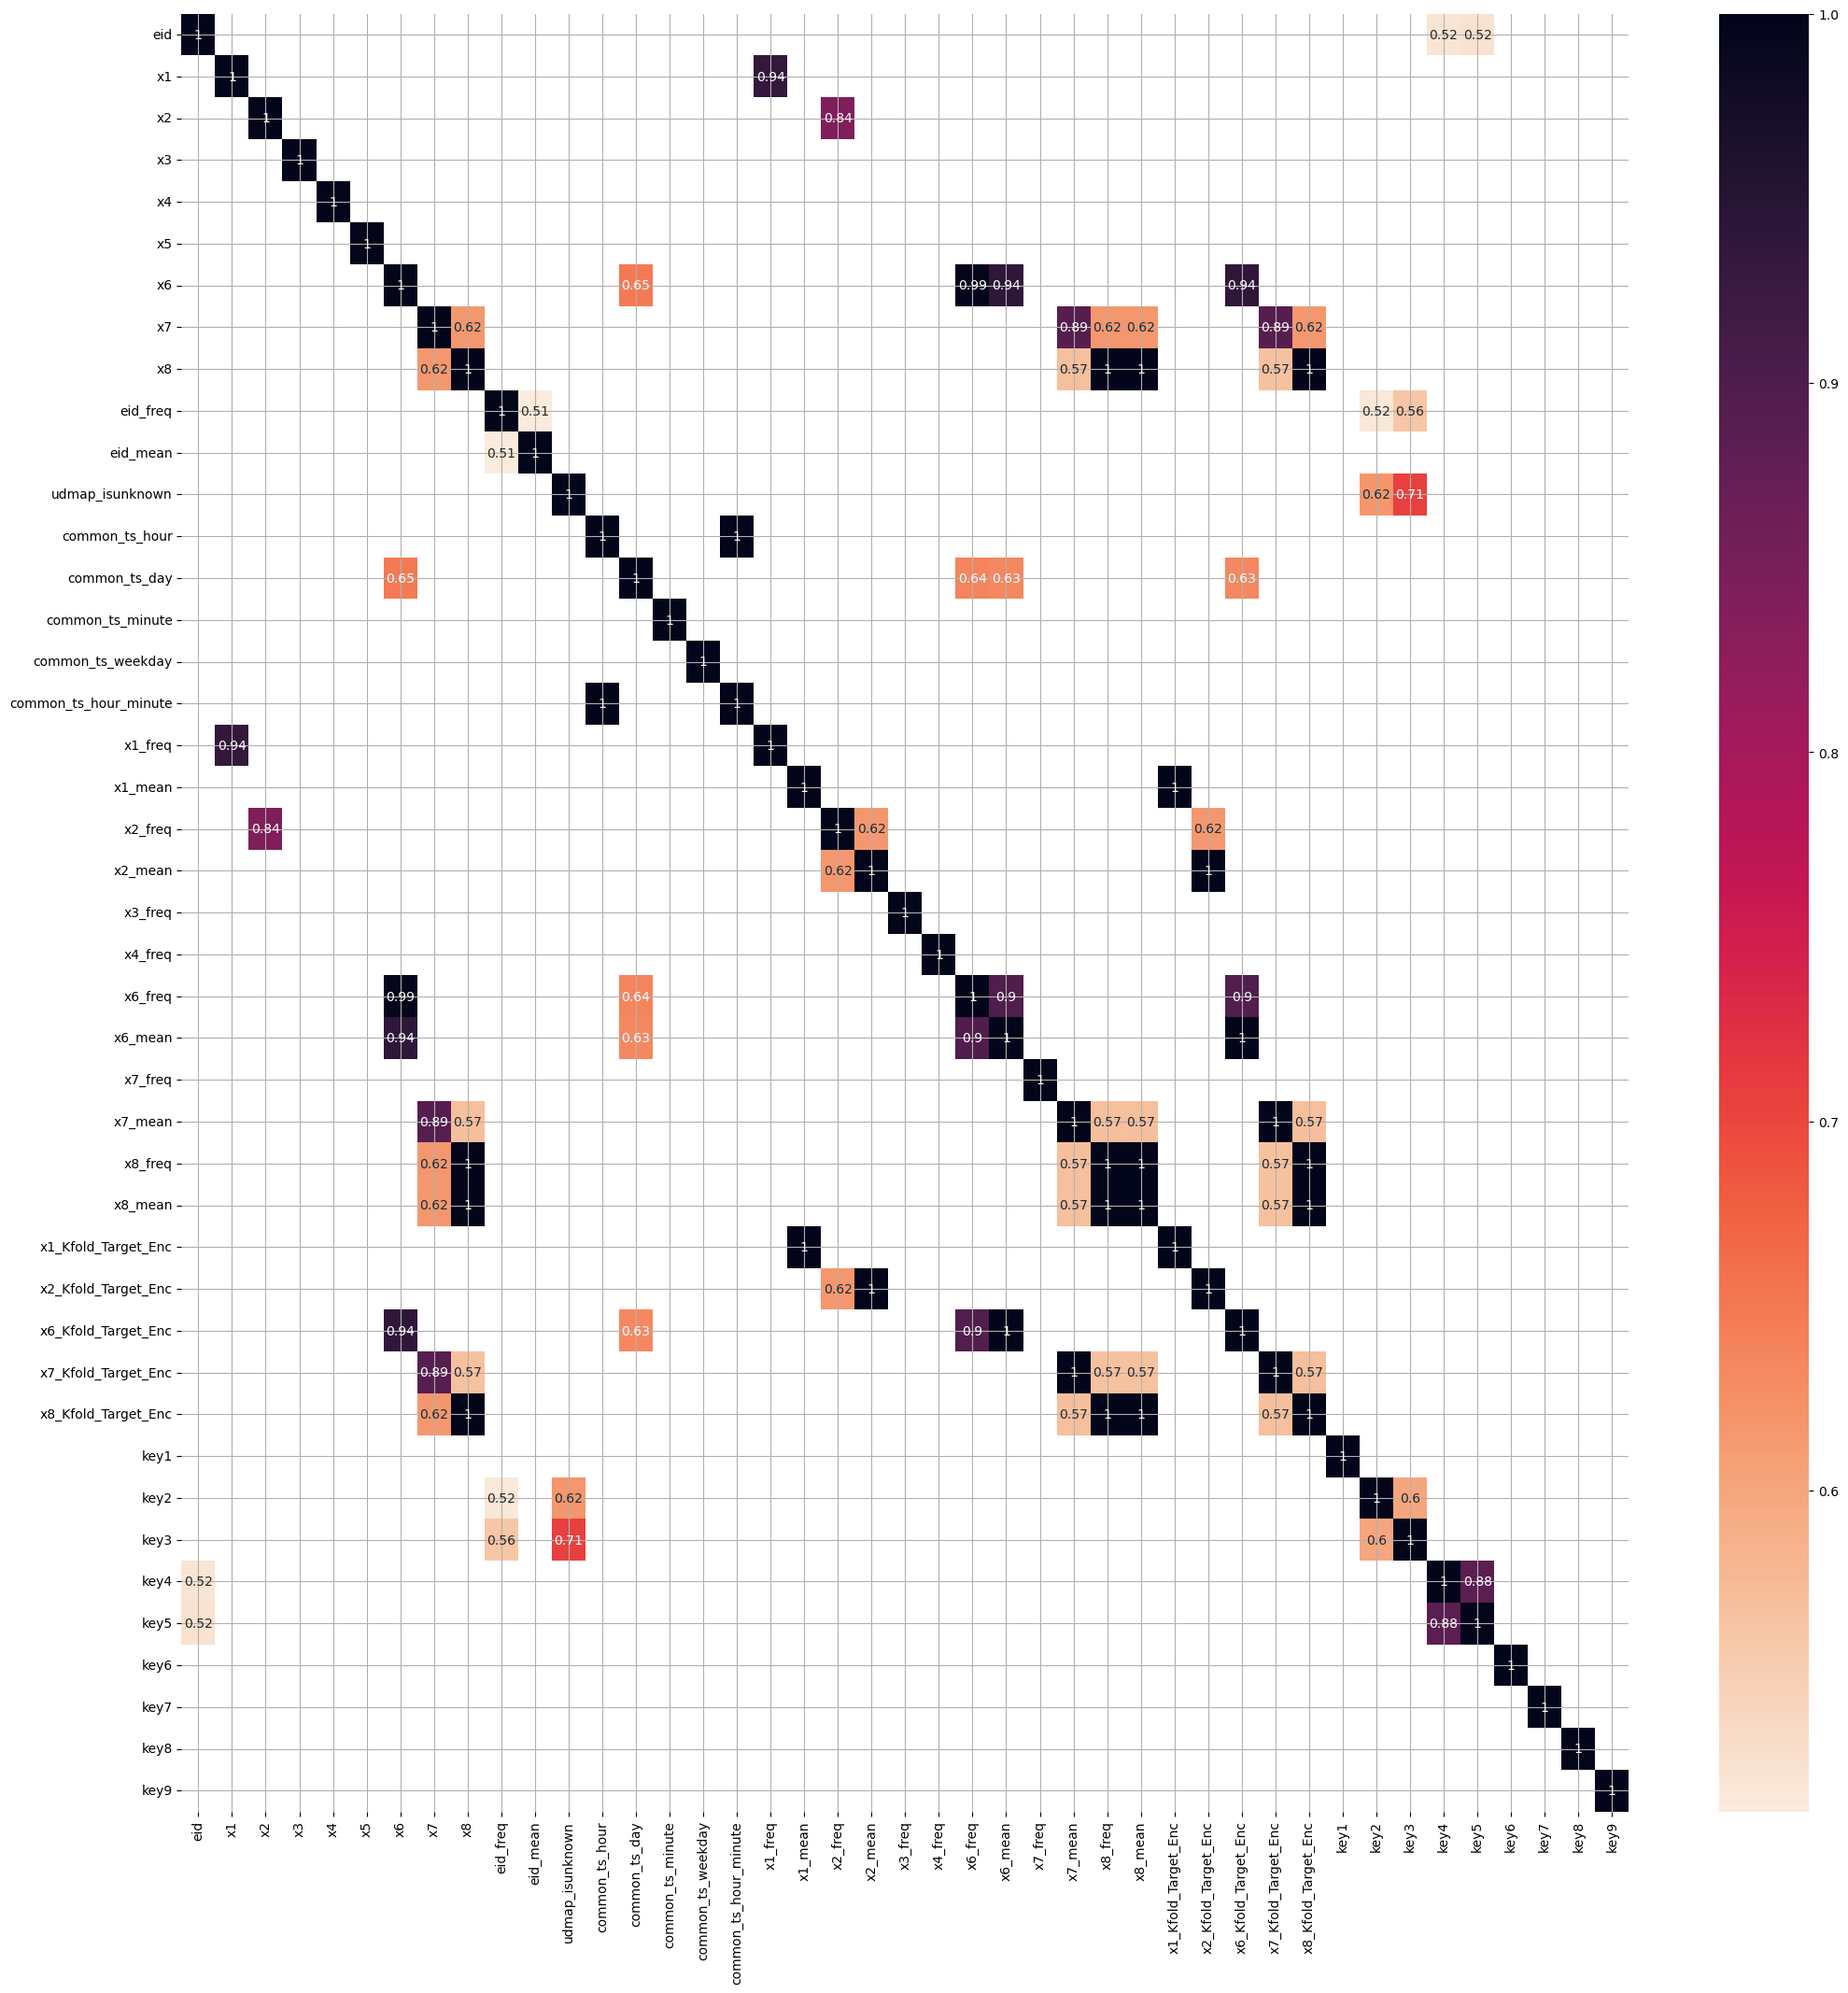

In [19]:
#画出不同特征之间的相关性

train_corr_df = abs(train_data.corr())
train_corr_df = train_corr_df[abs(train_corr_df)>=0.5]
plt.figure(figsize=(25,25))
sns.heatmap(train_corr_df,annot=True,cmap='rocket_r',cbar=True)
plt.grid()
plt.show()

In [20]:
train_corr_df.shape

(43, 43)

# 删除两两之间相关性大的特征

## 比如x7和x8，还有x7,x8,x7_mean,x8_freq,x8_mean,x7_Kfold_Target_Enc,x8_Kfold_Target_Enc,用这几个特征再进行重要性分析，保留一个或两个

In [21]:
#评价特征重要性
from sklearn.ensemble import RandomForestClassifier

raf_clf = RandomForestClassifier()

In [22]:
train_data.columns

Index(['eid', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'eid_freq',
       'eid_mean', 'udmap_isunknown', 'common_ts_hour', 'common_ts_day',
       'common_ts_minute', 'common_ts_weekday', 'common_ts_hour_minute',
       'x1_freq', 'x1_mean', 'x2_freq', 'x2_mean', 'x3_freq', 'x4_freq',
       'x6_freq', 'x6_mean', 'x7_freq', 'x7_mean', 'x8_freq', 'x8_mean',
       'x1_Kfold_Target_Enc', 'x2_Kfold_Target_Enc', 'x6_Kfold_Target_Enc',
       'x7_Kfold_Target_Enc', 'x8_Kfold_Target_Enc', 'key1', 'key2', 'key3',
       'key4', 'key5', 'key6', 'key7', 'key8', 'key9'],
      dtype='object')

In [23]:
train_data_eval = train_data.iloc[0:20000,:]
train_target_eval = train_target[:20000]
raf_clf.fit(train_data,train_target)

RandomForestClassifier()

In [24]:
libary = dict(zip(train_data.columns,raf_clf.feature_importances_))

In [25]:
list_libary = sorted(list(zip(raf_clf.feature_importances_,train_data.columns)),reverse=True)

In [26]:
list_libary

[(0.11770636674156788, 'common_ts_hour_minute'),
 (0.09159779450338466, 'x5'),
 (0.09044867249636006, 'common_ts_minute'),
 (0.07109628463099216, 'common_ts_hour'),
 (0.06492955661487369, 'x4'),
 (0.06483504375834671, 'x4_freq'),
 (0.0511290718197269, 'eid_mean'),
 (0.05099612198758473, 'common_ts_day'),
 (0.0386010131082354, 'common_ts_weekday'),
 (0.035211892399666024, 'x7_Kfold_Target_Enc'),
 (0.02787845605125207, 'x2_Kfold_Target_Enc'),
 (0.026201647386152476, 'x1_Kfold_Target_Enc'),
 (0.02587513923230819, 'key3'),
 (0.02509077482096456, 'eid_freq'),
 (0.020571879235436952, 'key2'),
 (0.018993874413389573, 'x7_mean'),
 (0.018002550484125305, 'x6_Kfold_Target_Enc'),
 (0.016392608236672605, 'x8_Kfold_Target_Enc'),
 (0.014729986217960117, 'eid'),
 (0.013281932911544322, 'x7_freq'),
 (0.012881164500678825, 'x7'),
 (0.012083760018131297, 'x2_mean'),
 (0.011823878219814503, 'x2_freq'),
 (0.011325001979746424, 'x2'),
 (0.010474363965423375, 'x1'),
 (0.010438246335063971, 'x1_mean'),
 (0.0

In [27]:
#综合以上两个特征分析结果，选择要删去的特征(这个结果是第一次没有添加很多其它特征得到的结果，只是流程参考，不是最终筛选结果)

columns_to_drop = ['x8','eid_freq','key2','key5','key9','key7','key6','x3','udmap_isunknown','key4','eid','key1']
columns_to_drop_1 = ['key8','key7','key9','key6','udmap_isunknown','x3','eid_freq']

In [28]:
train_data_1 = train_data.drop(columns=columns_to_drop,axis=1)
train_data_1.columns

Index(['x1', 'x2', 'x4', 'x5', 'x6', 'x7', 'eid_mean', 'common_ts_hour',
       'common_ts_day', 'common_ts_minute', 'common_ts_weekday',
       'common_ts_hour_minute', 'x1_freq', 'x1_mean', 'x2_freq', 'x2_mean',
       'x3_freq', 'x4_freq', 'x6_freq', 'x6_mean', 'x7_freq', 'x7_mean',
       'x8_freq', 'x8_mean', 'x1_Kfold_Target_Enc', 'x2_Kfold_Target_Enc',
       'x6_Kfold_Target_Enc', 'x7_Kfold_Target_Enc', 'x8_Kfold_Target_Enc',
       'key3', 'key8'],
      dtype='object')

In [29]:
train_data_1.shape

(620356, 31)

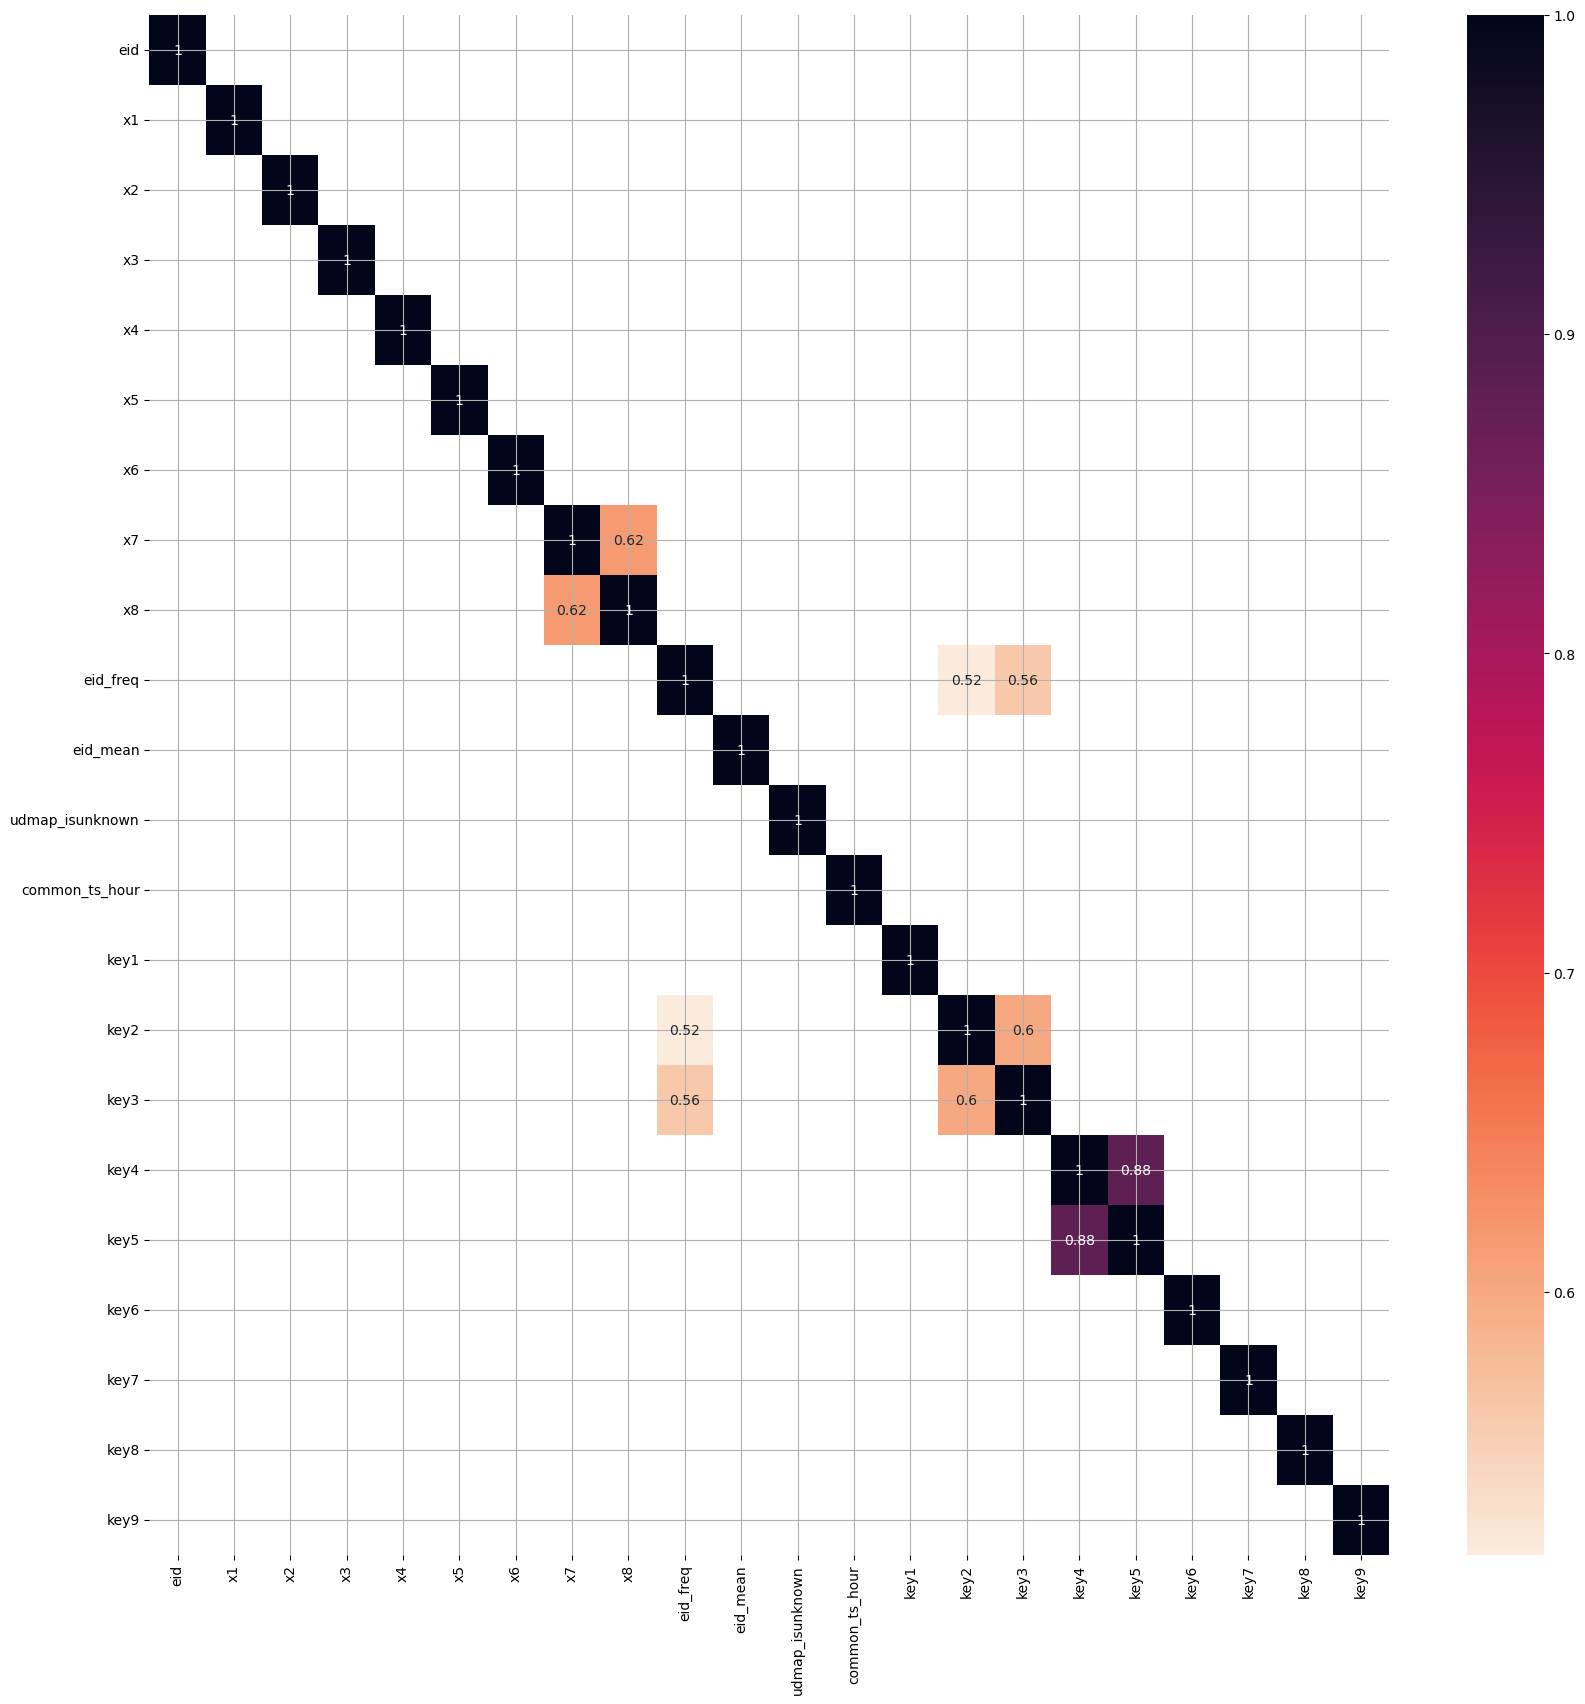

In [23]:
#筛选好特征之后的验证(流程参考)

train_corr_df2 = train_data.corr()
train_corr_df2 = train_corr_df2[abs(train_corr_df2>0.5)]
plt.figure(figsize=(20,20))
sns.heatmap(train_corr_df2,annot=True,cmap='rocket_r',cbar=True)
plt.grid()
plt.show()

In [31]:
#查看特征的数值类型，一些float类型的特征可用astype(int)转化为int类型
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620356 entries, 0 to 620355
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   eid                    620356 non-null  int64  
 1   x1                     620356 non-null  int64  
 2   x2                     620356 non-null  int64  
 3   x3                     620356 non-null  int64  
 4   x4                     620356 non-null  int64  
 5   x5                     620356 non-null  int64  
 6   x6                     620356 non-null  int64  
 7   x7                     620356 non-null  int64  
 8   x8                     620356 non-null  int64  
 9   eid_freq               620356 non-null  int64  
 10  eid_mean               620356 non-null  float64
 11  udmap_isunknown        620356 non-null  int32  
 12  common_ts_hour         620356 non-null  int32  
 13  common_ts_day          620356 non-null  int32  
 14  common_ts_minute       620356 non-null  i

In [32]:
#方差过大的特征进行归一化，但如果使用决策树就不用归一化
from sklearn.preprocessing import minmax_scale

In [34]:
from sklearn.utils import shuffle
from sklearn.preprocessing import minmax_scale
X = train_data
y = train_target

X_shuffle,y_shuffle = shuffle(X,y,random_state=3247)

In [35]:
#处理目标类别不均衡时可用的参数
sum_1 = y_shuffle[y_shuffle == 1].count()
sum_0 = y_shuffle[y_shuffle == 0].count()

scale_pos_weight = sum_0/sum_1

# Model

In [36]:
#使用贝叶斯搜索
import xgboost as xgb

In [37]:
def hyperopt_eval_func(params, X, y):
    '''利用params里定义的模型和超参数，对X进行fit，并返回cv socre。
    Args:
        @params: 模型和超参数
        @X:输入参数
        @y:真值
    Return:
        @score: 交叉验证的损失值
    '''   
    
    int_feat = ['n_estimators', 'max_depth', 'min_child_weight']
    for p in int_feat:
        params[p] = int(params[p])    
    
    clf = xgb.XGBClassifier(**params,scale_pos_weight=6.1140927282944,tree_method='gpu_hist',gpu_id=0)        
 
    #用cv结果来作为评价函数
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    
    shuffle = KFold(n_splits=5, shuffle=True)
    score = -1 * cross_val_score(clf, X, y, scoring='f1', cv=shuffle).mean()
    
    return score

In [38]:
def hyperopt_binary_model(params):
    '''hyperopt评价函数，在hyperopt_eval_func外面包围了一层，增加一些信息输出
    Args:
        @params:用hyperopt调参优化得到的超参数
    Return:
        @loss_status: loss and status
        
    '''    
    global best_loss, count, binary_X, binary_y   
    count += 1 
    
    clf_type = params['type']   
    del params['type']
    loss = hyperopt_eval_func(params, binary_X, binary_y)
    print(count, loss)
    if loss < best_loss:
        ss = 'count:%d  new best loss: %4.3f , using %s'%(count, loss, clf_type)        
        print(ss)         
        best_loss = loss
 
    loss_status = {'loss': loss, 'status': STATUS_OK}
    return loss_status

In [39]:
def get_best_model_1(best):
    '''根据hyperopt搜索的参数，返回对应最优score的模型
    Args:
        @best:最优超参数
    Return:
        @clf: xgb model
    '''     
    int_feat = ['n_estimators', 'max_depth', 'min_child_weight']
    for p in int_feat:
        best[p] = int(best[p])
        
    #fix the random state
    best['seed'] = 2018    
    clf = xgb.XGBClassifier(**best,scale_pos_weight=6.1140927282944,tree_method='gpu_hist',gpu_id=0)
    
    return clf

In [40]:
from hyperopt import tpe,hp,fmin,STATUS_OK,Trials
from hyperopt.pyll.base import scope

In [41]:
def get_best_model(X_train, y_train, predictors, max_evals_num=10):
    '''利用hyperopt得到最优的xgb model
    Args:
        @X_train: 训练样本X 数据
        @y_train: 训练样本y target
        @predictors: 用于预测的特征
        @max_evals_num: hyperopt调参时的次数，次数越多，模型越优，但是也越耗费时间
    Return:
        @clf: 最优model
    '''
    space = {     
        'type': 'xgb',
        'n_estimators': hp.quniform('n_estimators', 1000,3000,25),
        'max_depth': hp.quniform('max_depth', 10, 30, 1),            
        'learning_rate': hp.uniform('learning_rate', 0.01, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'gamma': hp.uniform('gamma', 0, 1),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0) 
    }   
    
    #hyperopt train
    global count, best_loss, binary_X, binary_y
    count = 0
    best_loss = 1000000
    binary_X = X_train
    binary_y = y_train
    trials = Trials()
    best = fmin(hyperopt_binary_model, space, algo=tpe.suggest, max_evals=max_evals_num, trials=trials)
    print( 'best param:{}'.format(best))
    print('best trans cv mse on train:{}'.format(best_loss)) 
    
     
    clf = get_best_model_1(best)
    
    return clf

In [ ]:
model = xgb.XGBClassifier()
a = []
best_model = get_best_model(X_train=X_shuffle,y_train=y_shuffle,predictors=a)

In [ ]:
#找到最优模型后，还可以用cross_val_score进行验证
from sklearn.model_selection import cross_val_score
cross_val_score(best_model,X_shuffle,y_shuffle,scoring='f1',cv=5)

In [ ]:
best_model.fit(X_shuffle,y_shuffle)
res = best_model.predict(test_data)